In [1]:
# following the steps https://www.kaggle.com/solegalli/feature-selection-with-feature-engine

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("..\\train.csv")

In [4]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
df.shape

(76020, 371)

In [6]:
df.TARGET.value_counts()/len(df.TARGET)

0    0.960431
1    0.039569
Name: TARGET, dtype: float64

In [7]:
df.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['ID','TARGET'],axis=1), df.TARGET, test_size=0.3)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [10]:
y_train.value_counts(normalize=True), y_train.value_counts()

(0    0.960405
 1    0.039595
 Name: TARGET, dtype: float64,
 0    51107
 1     2107
 Name: TARGET, dtype: int64)

## Feature Engineering

In [11]:
# import feature selection libraries
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

In [12]:
# check for any missing values
df.isnull().sum() # difficult to see because of the number of columns

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [13]:
# check for any null values, and none found 
nullCols = []
for i in X_train.columns:
    if X_train[i].isnull().sum()>0:
        append.nullCols
print(nullCols)  

# [x for x in X_train.columns if X_train[x].isnull().sum() > 0]

[]


In [14]:
# we can see that these columns only have one value 
X_train.columns[X_train.nunique()==1]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
       'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [15]:
X_train.ind_var2_0.value_counts()

0    53214
Name: ind_var2_0, dtype: int64

### Check for constant Features

In [16]:
# tol=1, means to remove constant features
constant = DropConstantFeatures(tol=1)
# thenwe fit to find the features
constant.fit(X_train)

DropConstantFeatures()

In [17]:
constant.features_to_drop_

['ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_reemb_var33_1y3',
 'delta_num_reemb_var33_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_reemb_var33_ult1',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_reemb_var33_ult1',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3']

In [18]:
len(constant.features_to_drop_)

38

In [19]:
# check one feature to see if it really has a constant feature
df.ind_var2_0.unique()

array([0], dtype=int64)

In [20]:
print('The number of features before dropping constants: ', X_train.shape[1])

X_train = constant.transform(X_train)
X_test = constant.transform(X_test)

print('The number of feature after dropping constants: ', X_train.shape[1])

The number of features before dropping constants:  369
The number of feature after dropping constants:  331


### Check for quasiconstant features

In [21]:
quasi_cons = DropConstantFeatures(tol=0.998)
quasi_cons.fit(X_train)

DropConstantFeatures(tol=0.998)

In [22]:
quasi_cons.features_to_drop_

['imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_sal_var16_ult1',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var29_0',
 'ind_var29',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var44_0',
 'ind_var44',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var17_0',
 'num_var17',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace2',
 'num_op_var40_hace3',
 'num_var29_0',
 'num_var29',
 'num_var32_0',
 'num_var32',
 'num_var33_0',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var44_0',
 'num_var44',
 'saldo_var6',
 'saldo_var13_medio',
 'saldo_var17',
 'saldo_var18',
 'saldo_var29',
 'saldo_var32',
 'saldo_var33',
 'saldo_var34',
 'saldo_var44',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3

In [23]:
len(quasi_cons.features_to_drop_)

139

In [24]:
# percentage of observation for each value 
X_train.saldo_medio_var44_hace2.value_counts()/len(X_train)

0.00        0.998703
27781.50    0.000038
16940.43    0.000019
24579.15    0.000019
921.69      0.000019
              ...   
5153.22     0.000019
1702.74     0.000019
9529.20     0.000019
17835.72    0.000019
11322.42    0.000019
Name: saldo_medio_var44_hace2, Length: 69, dtype: float64

In [25]:
print('The number of features before dropping quasi-constants: ', X_train.shape[1])

X_train = quasi_cons.transform(X_train)
X_test = quasi_cons.transform(X_test)

print('The number of feature after dropping quasi-constants: ', X_train.shape[1])

The number of features before dropping quasi-constants:  331
The number of feature after dropping quasi-constants:  192


### Check for duplicated features

In [26]:
dups = DropDuplicateFeatures()

dups.fit(X_train)

DropDuplicateFeatures()

In [27]:
# here we see the group of identical variables
dups.duplicated_feature_sets_

[{'ind_var26', 'ind_var26_0'},
 {'ind_var25', 'ind_var25_0'},
 {'ind_var37', 'ind_var37_0'},
 {'ind_var39', 'ind_var40'},
 {'num_var26', 'num_var26_0'},
 {'num_var25', 'num_var25_0'},
 {'num_var37', 'num_var37_0'},
 {'num_var39', 'num_var40'}]

In [28]:
# check if it is indeed the case
X_train.ind_var26.equals(X_train.ind_var26_0)

True

In [29]:
# inspect actual variables
X_train[['ind_var26', 'ind_var26_0']].head()

,ind_var26,ind_var26_0
60314,0,0
17293,0,0
29488,0,0
39157,0,0
35689,0,0


In [30]:
print('Number of features before dropping: ', X_train.shape[1])

X_train = dups.transform(X_train)
X_test = dups.transform(X_test)

print('N0. of features after dropping: ', X_train.shape[1])

Number of features before dropping:  192
N0. of features after dropping:  184


### Drop Correlated Features

In [31]:
# if the variables is set to none, it will examine all variables
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
correlated.fit(X_train)

DropCorrelatedFeatures()

In [32]:
# Here we see features that are correlated, other items are correlated with multiple
correlated.correlated_feature_sets_

[{'imp_op_var39_comer_ult1',
  'imp_op_var39_comer_ult3',
  'imp_op_var41_comer_ult1',
  'imp_op_var41_comer_ult3'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3'},
 {'imp_op_var40_ult1', 'saldo_var40'},
 {'imp_op_var39_efect_ult1',
  'imp_op_var39_efect_ult3',
  'imp_op_var39_ult1',
  'imp_op_var41_efect_ult1',
  'imp_op_var41_ult1'},
 {'ind_var1_0', 'ind_var40_0', 'num_var1_0', 'num_var40_0'},
 {'ind_var1', 'ind_var40', 'num_var1', 'num_var40'},
 {'ind_var5_0',
  'ind_var8',
  'ind_var8_0',
  'num_var5_0',
  'num_var8',
  'num_var8_0'},
 {'ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var42', 'num_var5'},
 {'ind_var12', 'ind_var12_0', 'num_var12', 'num_var12_0', 'num_var42_0'},
 {'ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0'},
 {'ind_var13_largo',
  'ind_var13_largo_0',
  'num_meses_var13_largo_ult3',
  'num_var13_largo',
  'num_var13_l

In [33]:
import seaborn as sns

<AxesSubplot:>

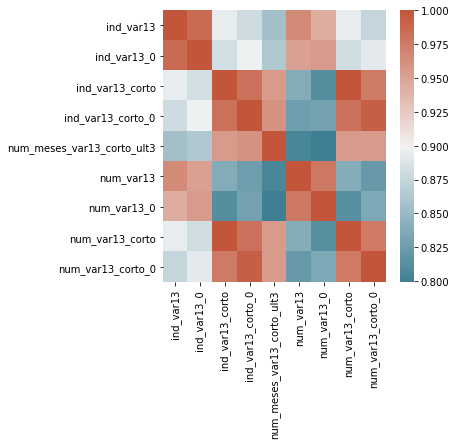

In [34]:
# plot a correlation map with some of the features 

corrmat = X_train[['ind_var13',
  'ind_var13_0',
  'ind_var13_corto',
  'ind_var13_corto_0',
  'num_meses_var13_corto_ult3',
  'num_var13',
  'num_var13_0',
  'num_var13_corto',
  'num_var13_corto_0']].corr(method='pearson')

cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig,ax=plt.subplots()
fig.set_size_inches(5,5)

sns.heatmap(corrmat, cmap=cmap)

the plot shows correlation over 0.8

In [35]:
len(correlated.features_to_drop_)

102

In [36]:
print('No. of features before removal: ', X_train.shape[1])

X_train = correlated.transform(X_train)
X_test = correlated.transform(X_test)

print('No. of features after removal: ', X_test.shape[1])

No. of features before removal:  184
No. of features after removal:  82


### Smart selection of correlated features



In [37]:
smart_corr = SmartCorrelatedSelection(variables=None, # examines all variables
                                     method='pearson', # correlation method
                                     threshold=0.7, # correlation coefficient threshold
                                     missing_values='ignore', #
                                     selection_method='model_performance', # how features are selected
                                     estimator=RandomForestClassifier(n_estimators=10,random_state=1)) # model for deriving importance

# This method simply finds correlated features and select the best from each group
# It builds a random forrest from each correlated feature and retains the feature with best performance

smart_corr.fit(X_train, y_train)

SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                          random_state=1),
                         selection_method='model_performance', threshold=0.7)

In [38]:
smart_corr.correlated_feature_sets_

[{'imp_op_var39_comer_ult1', 'num_op_var41_ult1'},
 {'imp_op_var40_comer_ult1', 'imp_op_var40_ult1', 'num_op_var40_comer_ult1'},
 {'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3'},
 {'ind_var1_0', 'var21'},
 {'ind_var5_0', 'num_meses_var8_ult3'},
 {'ind_var5', 'num_var30'},
 {'ind_var12_0', 'ind_var24_0', 'num_var30_0'},
 {'ind_var13_largo_0', 'saldo_var13_largo'},
 {'ind_var31_0', 'num_var31'},
 {'saldo_var12', 'saldo_var30'},
 {'delta_imp_aport_var13_1y3', 'imp_aport_var13_ult1', 'num_aport_var13_ult1'},
 {'imp_aport_var13_hace3', 'num_aport_var13_hace3'},
 {'imp_trans_var37_ult1', 'imp_var43_emit_ult1'},
 {'num_var22_hace2', 'num_var22_ult3'},
 {'num_med_var45_ult3', 'num_var45_hace3'}]

In [39]:
# Here we examine the performance of RF based on each of the features that we select to understand what is happening

group = smart_corr.correlated_feature_sets_[5] # select the 6th group

for f in group:
    model=cross_validate(RandomForestClassifier(n_estimators=10,
                                random_state=1),
                        X_train[f].to_frame(),
                        y_train, cv=3,
                        return_estimator=False,
                        scoring='roc_auc')
    print(f,model['test_score'].mean())

num_var30 0.6703399650374902
ind_var5 0.6596385035501576


num_var30_0 returns the highest score so it will be retained

In [40]:
# Check to see if it will be dropped

'num_var30_0' in smart_corr.features_to_drop_

False

In [41]:
# Check to see if it will be dropped

'ind_var12_0' in smart_corr.features_to_drop_

True

In [42]:
print('No. of features before: ', X_train.shape[1])

X_train = smart_corr.transform(X_train)
X_test = smart_corr.transform(X_test)

print('No. of features after: ', X_train.shape[1])

No. of features before:  82
No. of features after:  64


### Use pipeline to select features

In [43]:
data = pd.read_csv("..\\train.csv")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['ID','TARGET'], axis=1),
    data['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((53214, 369), (22806, 369))

In [44]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

pipe.fit(X_train, y_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(estimator=RandomForestClassifier(n_estimators=10,
                                                                           random_state=1),
                                          selection_method='model_performance'))])

In [ ]:
print('No. of features before: ', X_train.shape[1])

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

print('No. of features after: ', X_tr)